In [1]:
# Импортируем необходимые библиотеки
import pandas as pd  # Pandas для работы с данными
import re  # Регулярные выражения для обработки строк
import matplotlib.pyplot as plt  # Модуль для построения графиков
from wordcloud import WordCloud  # Облако тегов для текстовых данных

In [2]:
# Загружаем данные из файла CSV в переменную 'data'
data = pd.read_csv('https://raw.githubusercontent.com/jpasyeva/TLP/main/3_lab/3_2/data.csv')

# Выводим первые 5 строк датасета для ознакомления
data.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


Задание 2.1	Построить график компаний с самым большим кол-вом вакансий

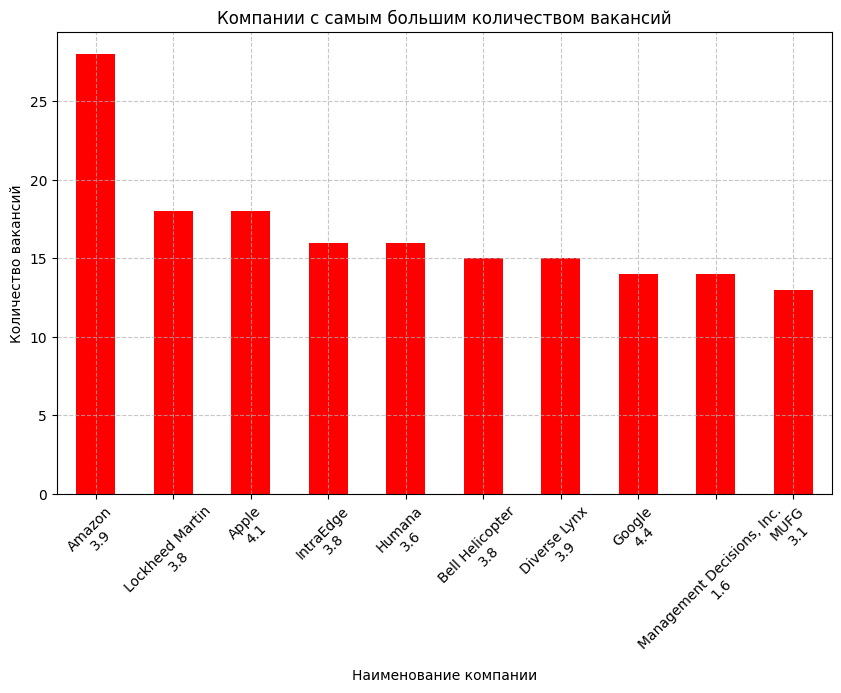

In [13]:
# Вычисление количества вакансий для каждой компании (топ-10) и построение графика
vac_by_company = data['Company Name'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 6))
vac_by_company.plot(kind='bar', color='red')
plt.title('Компании с самым большим количеством вакансий')
plt.xlabel('Наименование компании')
plt.ylabel('Количество вакансий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Задание 2.2	Построить график самых популярный названий в вакансиях

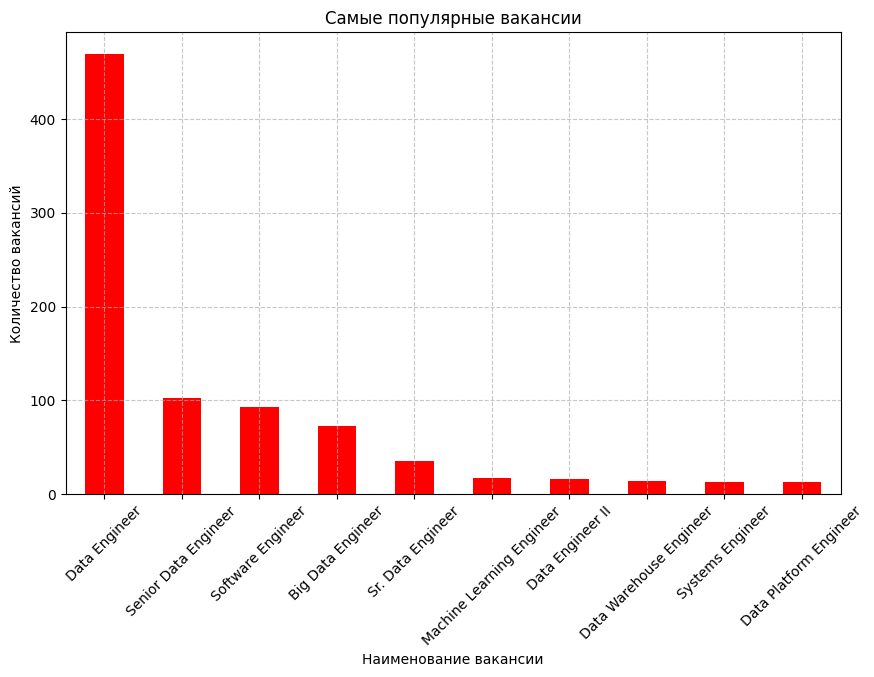

In [14]:
# Вычисление количества вакансий для каждого названия вакансии (топ-10) и построение графика
popular_vac = data['Job Title'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 6))
popular_vac.plot(kind='bar', color='red')
plt.title('Самые популярные вакансии')
plt.xlabel('Наименование вакансии')
plt.ylabel('Количество вакансий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Задание 2.3	Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

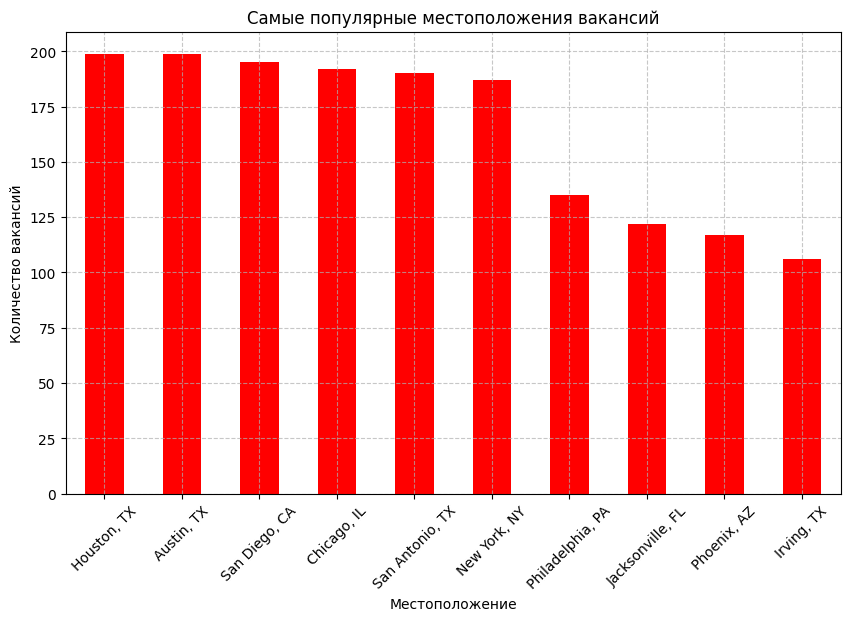

In [5]:
# Вычисление количества вакансий для каждого местоположения (топ-10) и построение графика
popular_vac_reg_cnt = data['Location'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 6))
popular_vac_reg_cnt.plot(kind='bar', color='red')
plt.title('Самые популярные местоположения вакансий')
plt.xlabel('Местоположение')
plt.ylabel('Количество вакансий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

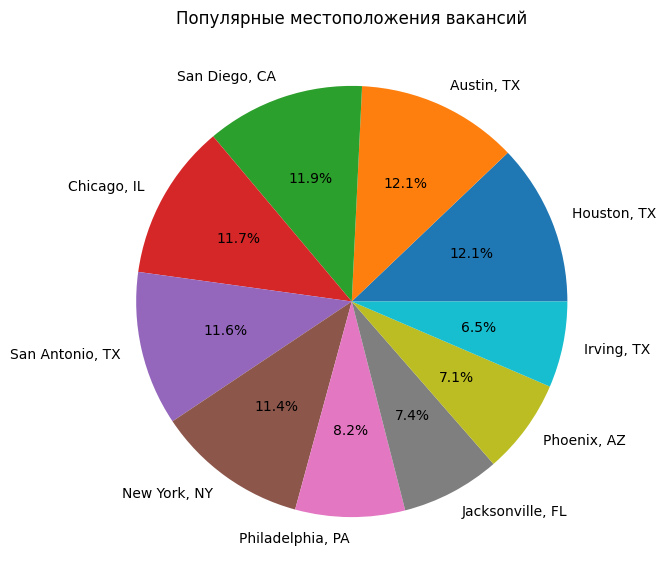

In [6]:
# Построение круговой диаграммы
plt.figure(figsize=(7, 7))
popular_vac_reg_cnt.plot(kind='pie', autopct='%1.1f%%')
plt.title('Популярные местоположения вакансий')
plt.ylabel('')
plt.show()

Задание 2.4	Построить график популярности по колонке Type ofownership, относительно численности вакансий

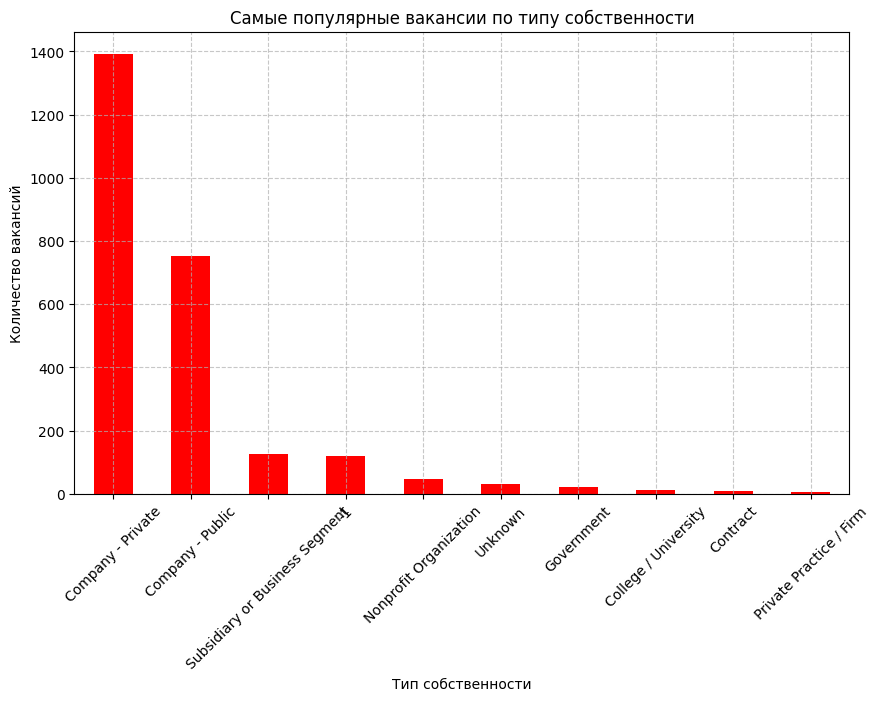

In [15]:
# Вычисление количества вакансий для каждого типа собственности (топ-10) и построение графика
type_of_ownership = data['Type of ownership'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 6))
type_of_ownership.plot(kind='bar', color='red')
plt.title('Самые популярные вакансии по типу собственности')
plt.xlabel('Тип собственности')
plt.ylabel('Количество вакансий')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Задание 2.5	Построить график популярности по секторам работы

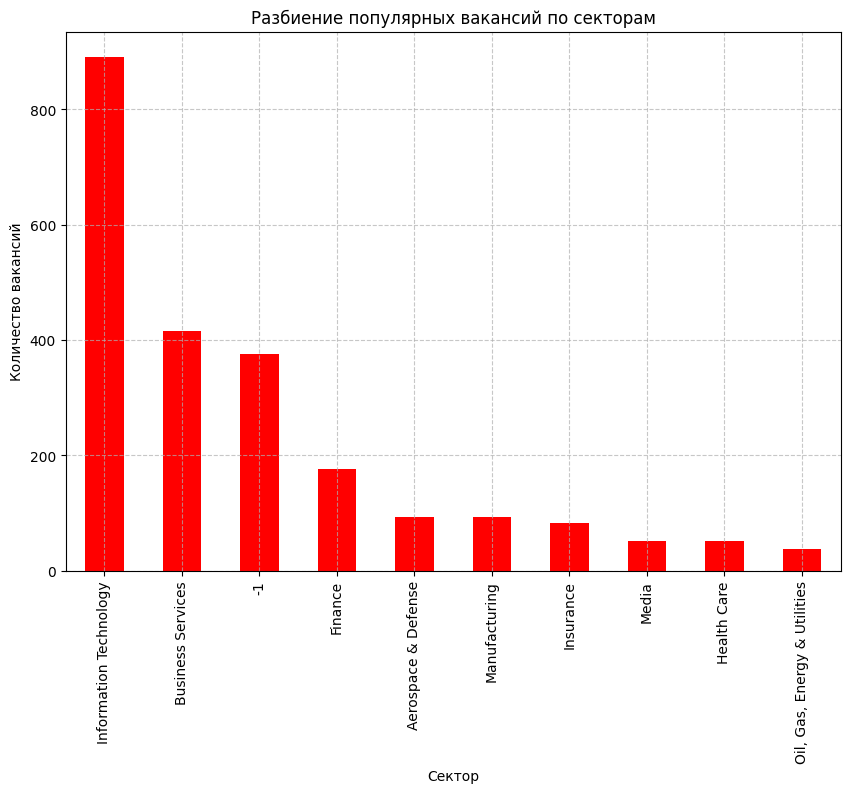

In [8]:
# Вычисление количества вакансий для каждого сектора работы (топ-10) и построение графика
cnt_sector = data['Sector'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 7))
cnt_sector.plot(kind='bar', color='red')
plt.title('Разбиение популярных вакансий по секторам')
plt.xlabel('Сектор')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Задание 2.6	Построить график используя сектора работы и средний уровень зарплат в них

<ipython-input-9-c880a03b3d8d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Salary Estimate'] = data['Salary Estimate'].str.replace('$', '').str.replace('K', '000').str.replace('€', '').str.replace('£', '')


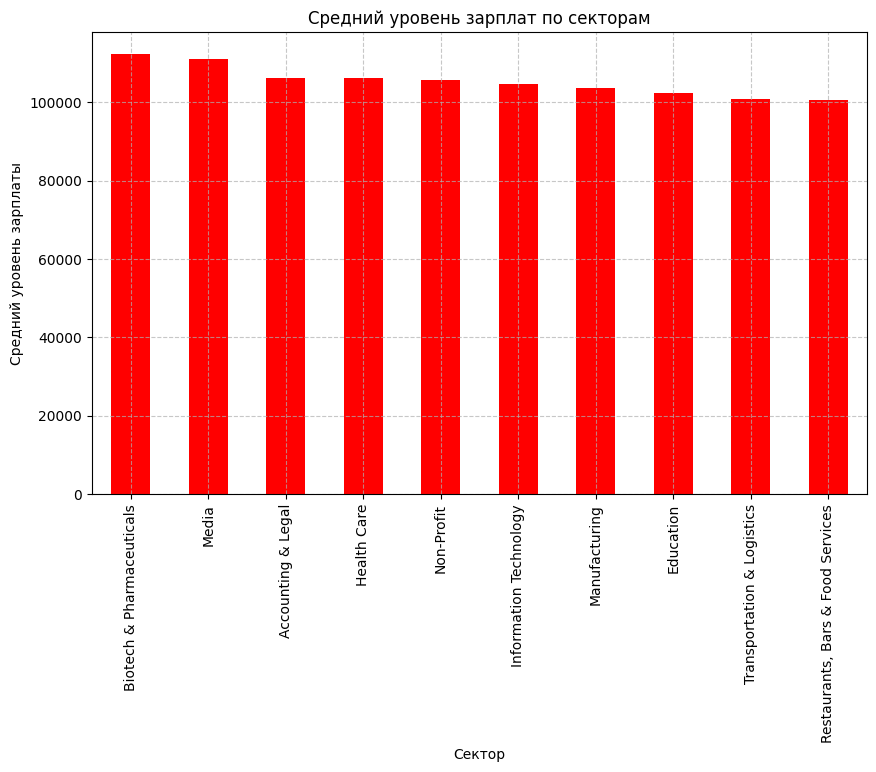

In [9]:
# Очистка и преобразование данных по зарплате
data['Salary Estimate'] = data['Salary Estimate'].apply(lambda x: re.sub(r'\([^()]*\)', '', x))
data['Salary Estimate'] = data['Salary Estimate'].str.replace('$', '').str.replace('K', '000').str.replace('€', '').str.replace('£', '')
data[['Salary Start', 'Salary End']] = data['Salary Estimate'].str.split('-', expand=True)
data['Salary Start'] = pd.to_numeric(data['Salary Start'], errors='coerce')
data['Salary End'] = pd.to_numeric(data['Salary End'], errors='coerce')

data['Average Salary'] = (data['Salary Start'] + data['Salary End']) / 2

# Группировка по секторам и вычисление средней зарплаты (топ-10)
sector_mean_salary = data.groupby('Sector')['Average Salary'].mean().sort_values(ascending=False).head(10)

# Построение графика
plt.figure(figsize=(10, 6))
sector_mean_salary.plot(kind='bar', color='red')
plt.title('Средний уровень зарплат по секторам')
plt.xlabel('Сектор')
plt.ylabel('Средний уровень зарплаты')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

Задание 2.7	Построить гистограмму распределения рейтинга компаний

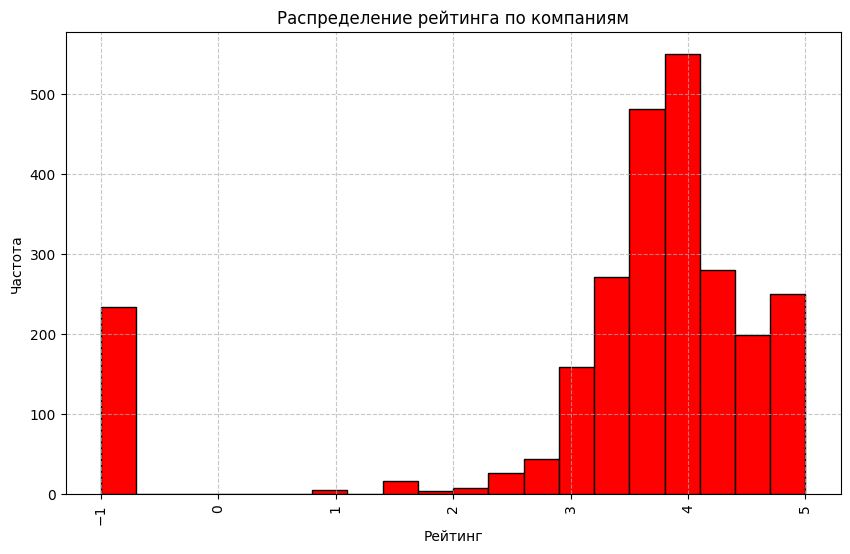

In [17]:
# Построение гистограммы распределения рейтинга компаний
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'], bins=20, color='red', edgecolor='black')
plt.title('Распределение рейтинга по компаниям')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

Задание 2.8	Построить график средних зарплат по популярным компаниям

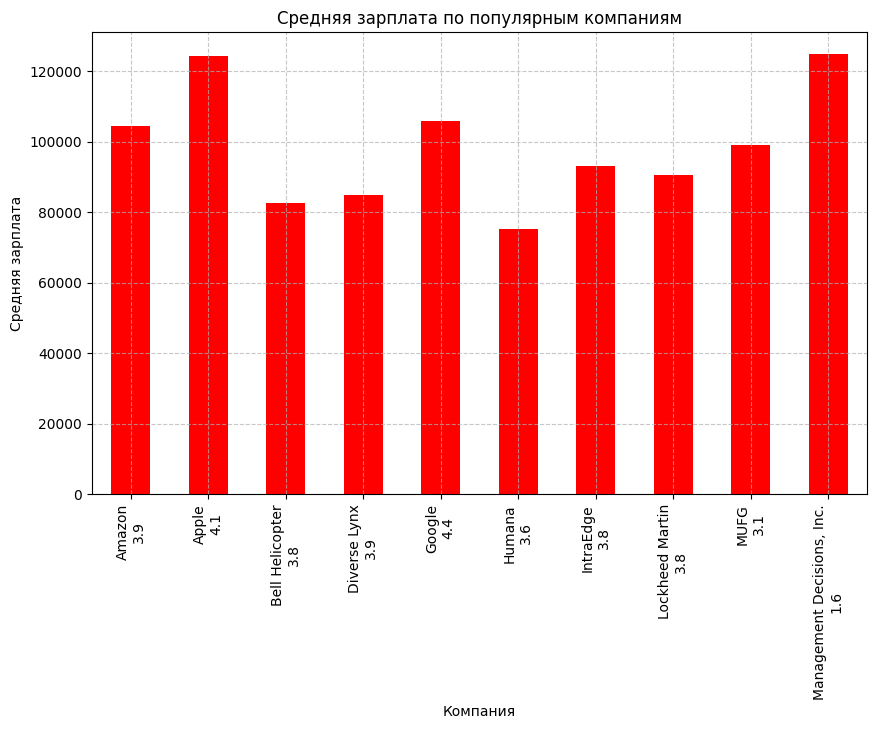

In [18]:
# Вычисление средней зарплаты для популярных компаний (топ-10) и построение графика
popular_companies = data['Company Name'].value_counts().head(10).index.tolist()
mean_salary = data[data['Company Name'].isin(popular_companies)].groupby('Company Name')['Average Salary'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
mean_salary.plot(kind='bar', color='red')
plt.title('Средняя зарплата по популярным компаниям')
plt.xlabel('Компания')
plt.ylabel('Средняя зарплата')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

Задание 2.9	Построить по описанию вакансий облако тегов, исследовать самые популярные слова

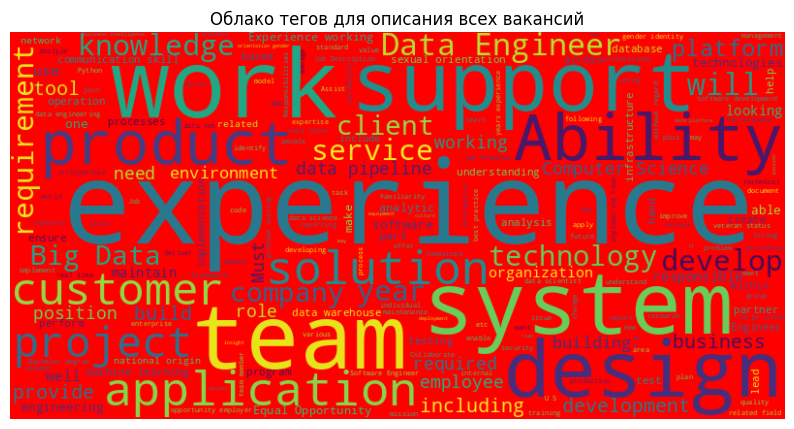

In [12]:
# Создание облака тегов для описания вакансий
txt = ' '.join(data['Job Description'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(txt)

# Построение облака тегов
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако тегов для описания всех вакансий')
plt.show()

Самые популярные слова в вакансиях: experience, system, team, application, work support.

Самые не популярные слова: mission, plan, large scale, issue, AWS